In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore') 

# Data Preprocessing

In [5]:
# 加载数据集
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [8]:
df.shape

(178, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [14]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
df=df.dropna()
df.shape

(178, 14)

In [18]:
df['target'].unique()

array([0, 1, 2])

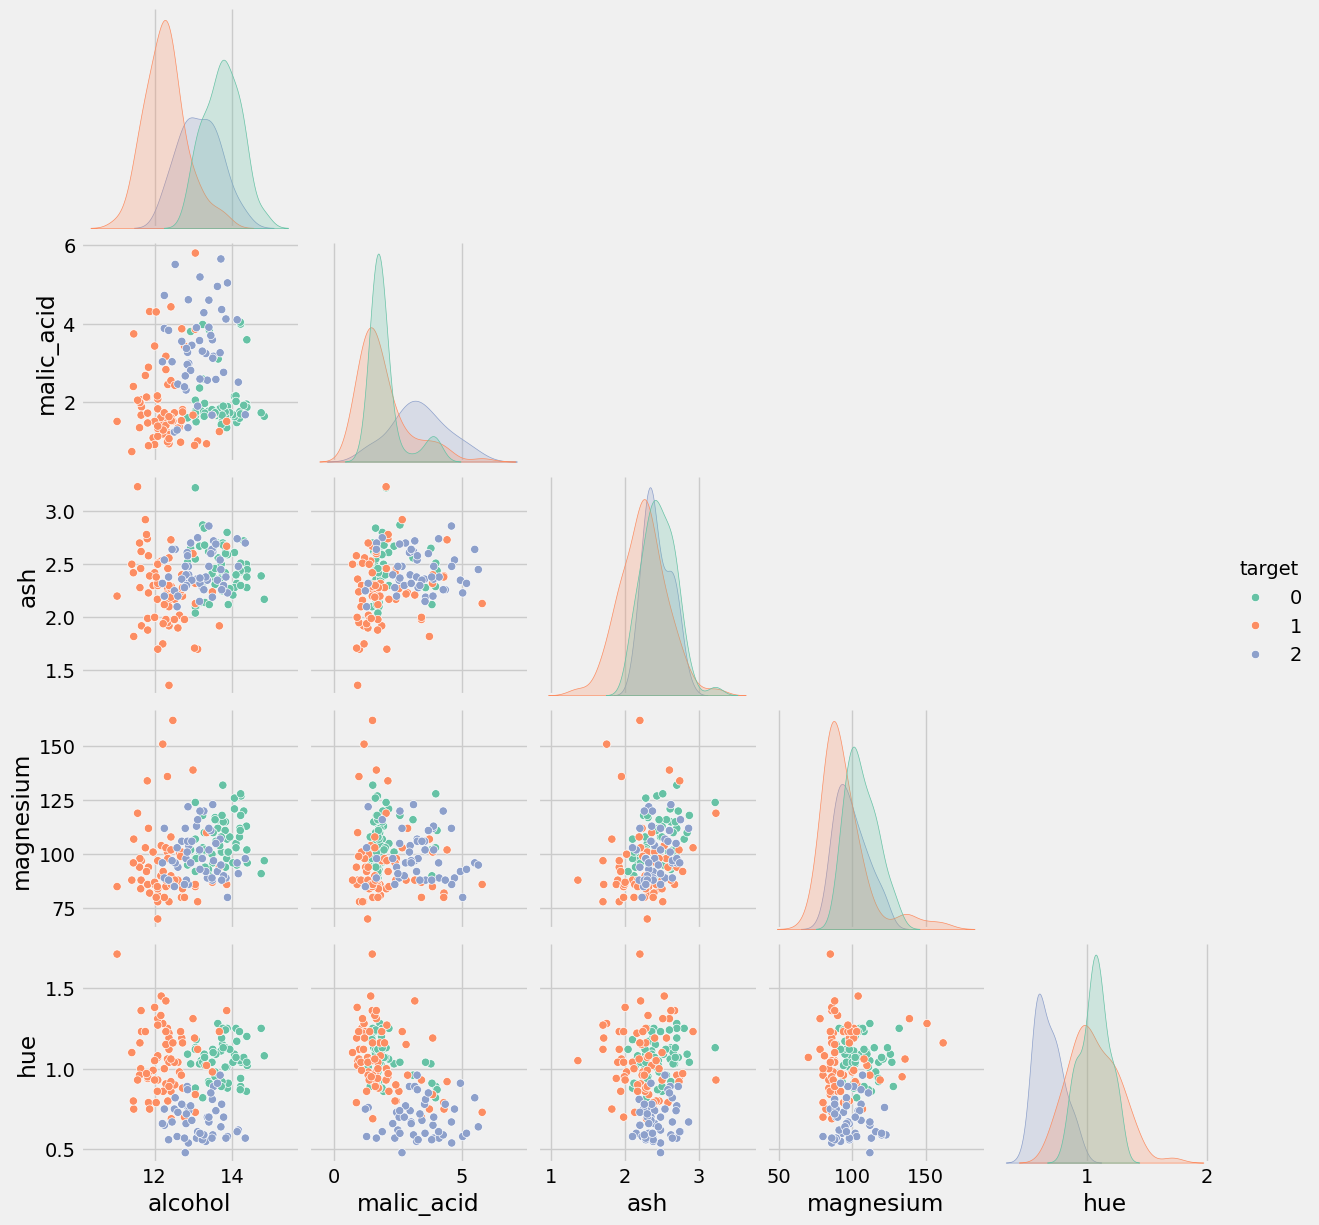

In [20]:
plot_features = ["alcohol", "malic_acid", "ash", "magnesium", "hue", "target"]
df_plot = df[plot_features]
sns.pairplot(df_plot, hue = 'target', corner=True, palette='Set2')
plt.savefig('D:/PythonProject/Pictures/wine_pairplot1.png', dpi = 300)

# K-Means Clustering

Silhouette score for k=2: 0.2855
Silhouette score for k=3: 0.3715
Silhouette score for k=4: 0.3008
Silhouette score for k=5: 0.2485
Silhouette score for k=6: 0.1627


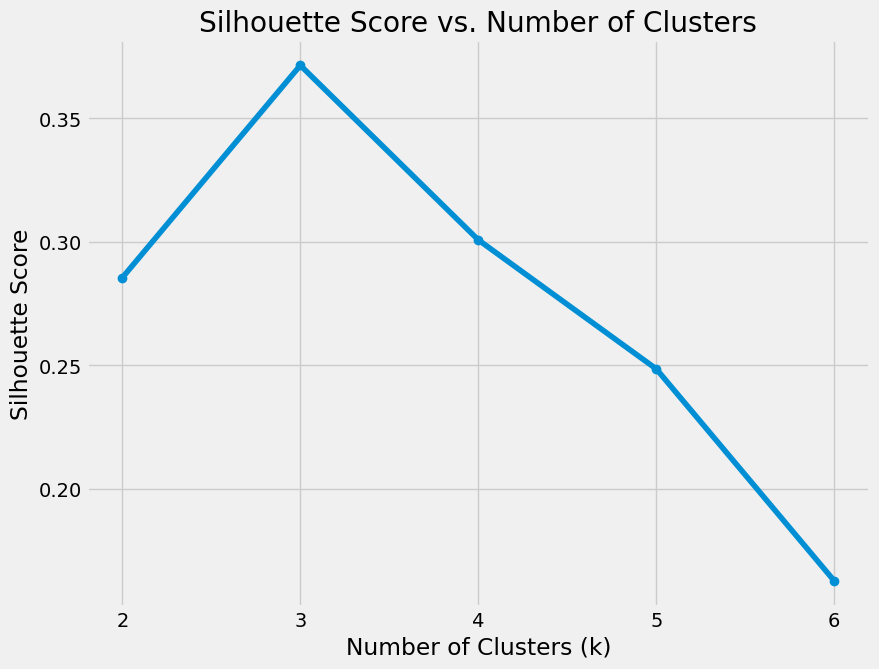

In [49]:
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# KMeans 聚类并 Silhouette 分析
scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# 可视化 silhouette 分数与聚类数 k 的关系
plt.figure(figsize=(9, 7))
plt.plot(range(2, 7), scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 7))
plt.grid(True)
plt.savefig('D:/PythonProject/Pictures/wine_k.png', dpi = 300)
plt.show()

In [26]:
# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 聚类 (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 添加聚类标签
df['cluster'] = clusters

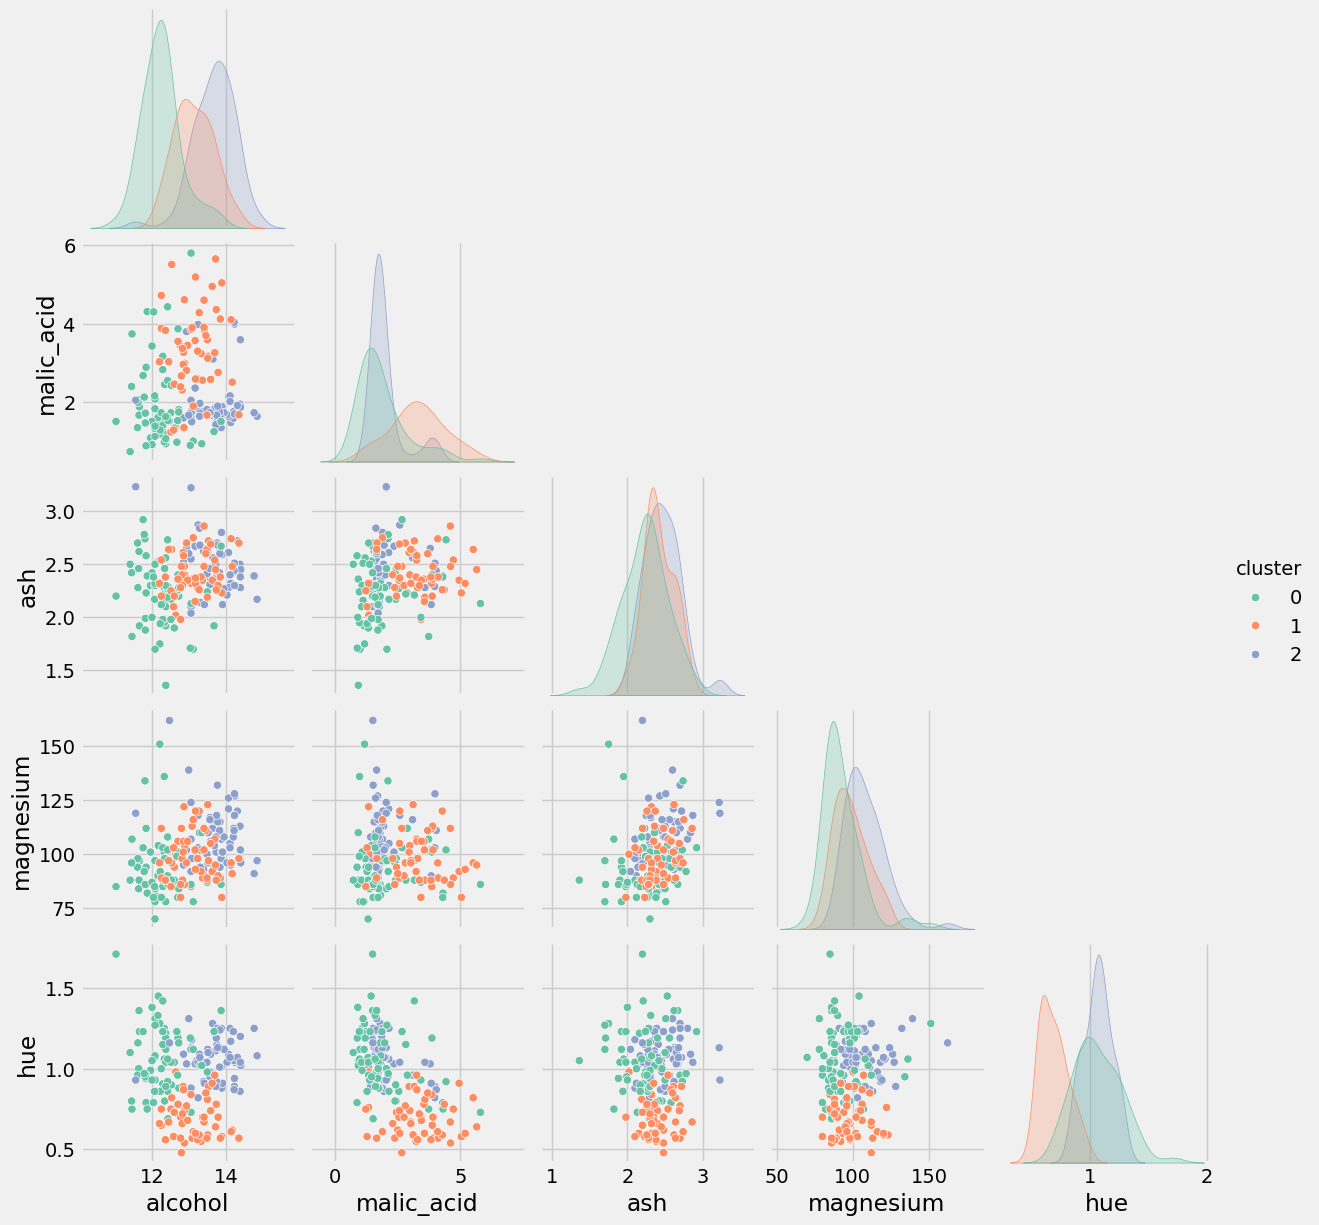

In [28]:
plot_features1 = ["alcohol", "malic_acid", "ash", "magnesium", "hue", "cluster"]
df_plot1 = df[plot_features1]
sns.pairplot(df_plot1, hue = 'cluster', corner=True, palette='Set2')
plt.savefig('D:/PythonProject/Pictures/wine_pairplot2.png', dpi = 300)

In [51]:
# 计算 Homogeneity, Completeness, V-measure
homo = homogeneity_score(y, clusters)
comp = completeness_score(y, clusters)
v = v_measure_score(y, clusters)

print(f"Homogeneity Score: {homo:.4f}")
print(f"Completeness Score: {comp:.4f}")
print(f"V-measure Score: {v:.4f}")

Homogeneity Score: 0.8788
Completeness Score: 0.8730
V-measure Score: 0.8759


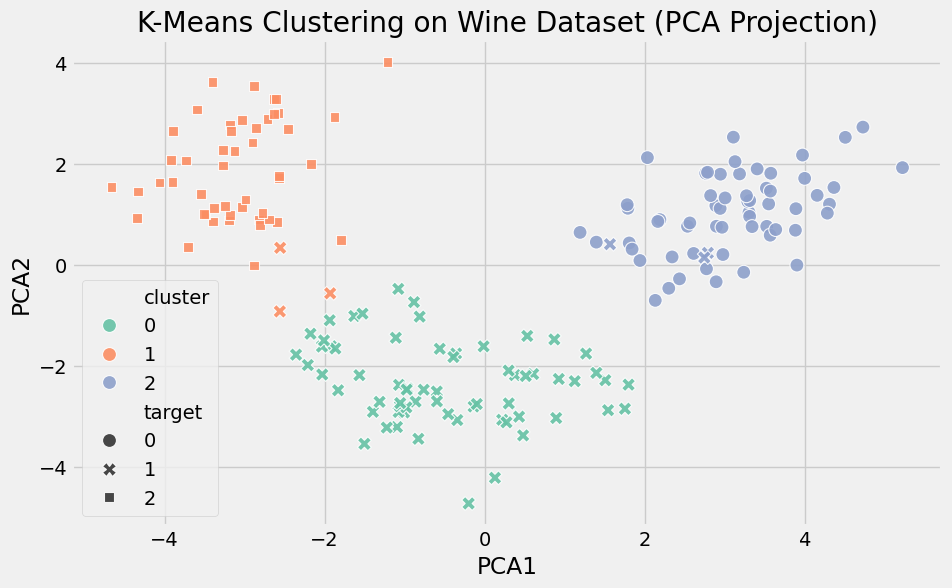

In [57]:
# PCA 降维用于可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 绘图 - KMeans 聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="cluster", palette="Set2", style="target", s=100, alpha = 0.9)
plt.title("K-Means Clustering on Wine Dataset (PCA Projection)")
plt.legend()
plt.savefig('D:/PythonProject/Pictures/wine_pca.png', dpi = 300)
plt.show()